<a href="https://colab.research.google.com/github/haniehghaffari/Deep_learning/blob/main/multi_input_multi_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import glob
from sklearn.model_selection import train_test_split
# from deep_net import FashionNet
from sklearn.preprocessing import LabelBinarizer#one_hot
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from tensorflow.keras import layers, models
from tensorflow import keras

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
# from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras import layers, models

from tensorflow.keras.models import Model
import tensorflow

In [590]:
import numpy as np
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/advance tensor/jalase2/ENB2012_data (1).xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [591]:
x = df.to_numpy()

In [592]:

heating = x[:,8]
cooling  = x[:,9]
x = x[:,0:8] 

In [593]:
trainx,testx ,trainheaty ,testheaty,traincooly ,testcooly  = train_test_split(x,heating,cooling,  test_size=0.2)


In [594]:

mean=trainx.mean(axis = 0)
std = np.std(trainx,dtype ='float64',axis = 0)
trainx = (trainx-mean)/std
testx = (testx-mean)/std


In [595]:
# min_max_scaler = MinMaxScaler()
# x_train=min_max_scaler.fit_transform(trainx)
# x_test =min_max_scaler.fit_transform(testx)

In [596]:
x_train=pd.DataFrame(trainx 
                     , columns =['X1','X2','X3','X4','X5','X6','X7','X8']  
                     )
x_test=pd.DataFrame(testx
                    , columns =['X1','X2','X3','X4','X5','X6','X7','X8'] 
                    )


In [597]:

x_train

,X1,X2,X3,X4,X5,X6,X7,X8
0,1.278327,-1.225116,0.004609,-1.198939,1.003263,-0.447797,0.095991,1.422850
1,-0.228908,0.162234,-1.693240,0.969392,-0.996748,-0.447797,-1.030218,-1.181114
2,-0.228908,0.162234,-1.693240,0.969392,-0.996748,1.343392,1.222199,0.771859
3,-0.040504,-0.115236,2.268407,-1.198939,1.003263,1.343392,0.095991,0.120868
4,-1.170930,1.272115,0.570558,0.969392,-0.996748,1.343392,1.222199,-1.181114
...,...,...,...,...,...,...,...,...
609,0.242103,-0.392706,0.570558,-0.656856,1.003263,0.447797,-1.030218,0.771859
610,-1.359334,1.549585,1.136508,0.969392,-0.996748,-1.343392,-1.781024,-1.832105
611,0.901518,-0.947646,-0.561341,-0.656856,1.003263,1.343392,1.222199,-1.181114
612,-0.040504,-0.115236,2.268407,-1.198939,1.003263,0.447797,0.095991,0.771859


In [642]:
ط

In [630]:
# x_train=np.array(x_train,'float64')
# x_test = np.array(x_test,'float64')

In [650]:
class HeatandCoolNet():
  @staticmethod
  def build():

    input_layer = keras.layers.Input(shape = (8,))
    
    # heat net
    x = keras.layers.Dense(256, activation= "relu")(input_layer)
    x = keras.layers.BatchNormalization()(x)
    x =keras.layers.Dropout(0.5)(x)
    x = keras.layers.BatchNormalization()(x)
    x =keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(256, activation= "relu")(x)
    x = keras.layers.BatchNormalization()(x)
    x =keras.layers.Dense(1)(x)
    
    heat_net = keras.layers.Activation("linear", name="heating_output")(x)

    # #cool net
    y = keras.layers.Dense(256, activation= "relu")(input_layer)
    y = keras.layers.BatchNormalization()(y)
    y = keras.layers.Dropout(0.25)(y)
    y = keras.layers.BatchNormalization()(y)
    y = keras.layers.Dense(256, activation= "relu")(y)
    y = keras.layers.BatchNormalization()(y)
    y =keras.layers.Dense(1)(y)

    cool_net = keras.layers.Activation("linear", name="cooling_output")(y)

    net = models.Model(inputs = input_layer,
                            outputs = [ heat_net, cool_net]
                            ,name = "HeatandCool"
                            )
    return net

In [651]:
net = HeatandCoolNet()
net = net.build()

In [652]:
# dictionary
losses = {
        "cooling_output": "mse",
        "heating_output": "mse",
        }

loss_weights = {
                "cooling_output": 1.0,
                "heating_output": 1.0}

In [653]:
net.compile(optimizer="adam",
            loss = losses, 
            loss_weights = loss_weights,
            # metrics = ["accuracy"]
            )

In [655]:
#fit is like train
H = net.fit(x=x_train,#one-input
            y = {"heating_output": trainheaty, "cooling_output": traincooly},#two-output 
            validation_data=(x_test,
                             {"heating_output": testheaty, "cooling_output": testcooly}),
              epochs=100, verbose = 1)

Epoch 1/100
20/20 [==============================] - 3s 27ms/step - loss: 1160.9955 - heating_output_loss: 533.6269 - cooling_output_loss: 627.3687 - val_loss: 1212.8259 - val_heating_output_loss: 538.4637 - val_cooling_output_loss: 674.3622
Epoch 2/100
20/20 [==============================] - 0s 14ms/step - loss: 1073.9889 - heating_output_loss: 485.5735 - cooling_output_loss: 588.4153 - val_loss: 1159.7502 - val_heating_output_loss: 521.8809 - val_cooling_output_loss: 637.8694
Epoch 3/100
20/20 [==============================] - 0s 13ms/step - loss: 1024.4066 - heating_output_loss: 461.0689 - cooling_output_loss: 563.3376 - val_loss: 1076.2839 - val_heating_output_loss: 488.3459 - val_cooling_output_loss: 587.9381
Epoch 4/100
20/20 [==============================] - 0s 13ms/step - loss: 958.2968 - heating_output_loss: 431.0549 - cooling_output_loss: 527.2419 - val_loss: 963.9220 - val_heating_output_loss: 438.9085 - val_cooling_output_loss: 525.0134
Epoch 5/100
20/20 [===============

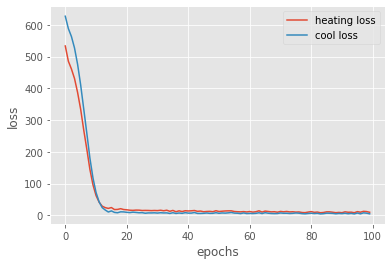

In [656]:
plt.plot(H.history["heating_output_loss"], label = "heating loss")
plt.plot(H.history["cooling_output_loss"], label = "cool loss")

# plt.plot(H.history["cooling_output_accuracy"], label="val cooling acc")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
plt.close()

In [657]:
net.summary()

Model: "HeatandCool"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_74 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_301 (Dense)               (None, 256)          2304        input_74[0][0]                   
__________________________________________________________________________________________________
batch_normalization_207 (BatchN (None, 256)          1024        dense_301[0][0]                  
__________________________________________________________________________________________________
dense_304 (Dense)               (None, 256)          2304        input_74[0][0]                   
________________________________________________________________________________________

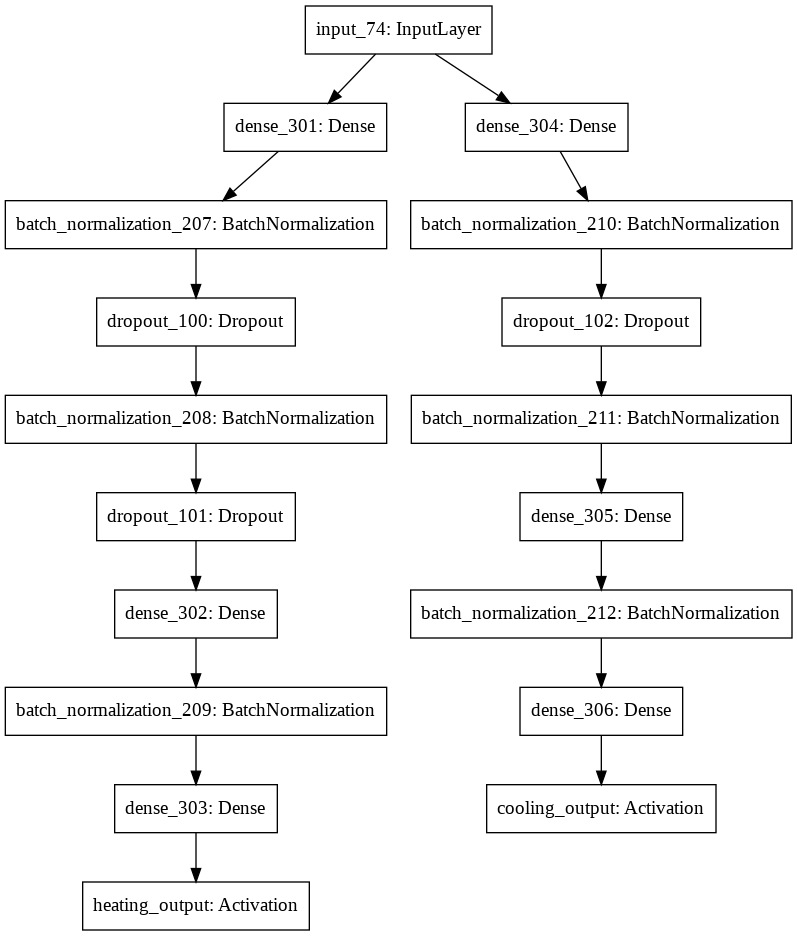

In [658]:
from tensorflow.keras.utils import plot_model
plot_model(net, to_file='net.png')
